In [1]:
import random
random.seed(1)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(1)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Reshape, Multiply, Input
from tensorflow.keras.models import Model



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:14<00:00, 197MB/s]
100% 2.04G/2.04G [00:14<00:00, 150MB/s]


In [ ]:
!ls

drive  plantvillage-dataset.zip  sample_data


now we are going to unzip the file

hee there is no significance of "r"

In [6]:
with ZipFile("plantvillage-dataset.zip",'r')as zip_ref:

  zip_ref.extractall()

here print(os.listdir.("plantvillage dataset/color")) is used to print the whole list

In [11]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
base_dir = '/content/plantvillage dataset/color'
img_size = 224  # Example image size
batch_size = 32  # Example batch size

# Initial split: 80% training, 20% temporary
initial_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = initial_data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',  # 80% for training
    class_mode='categorical',
    shuffle=True
)

temp_generator = initial_data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',  # 20% to be further split into validation and test
    class_mode='categorical',
    shuffle=True
)


Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [12]:
import tensorflow as tf

def move_images(generator, target_dir):
    class_names = list(generator.class_indices.keys())
    for class_name in class_names:
        os.makedirs(os.path.join(target_dir, class_name), exist_ok=True)

    for i in range(len(generator)):
        x, y = generator.next()
        for j in range(x.shape[0]):
            img = x[j]
            class_name = class_names[np.argmax(y[j])]
            img_save_path = os.path.join(target_dir, class_name, f"img_{i * batch_size + j}.png")
            tf.keras.preprocessing.image.save_img(img_save_path, img)

# Move temporary images to Google Drive
move_images(temp_generator, target_dir="/content/drive/MyDrive/temp_data")


In [14]:
# Create directories for validation and test sets in Google Drive
val_dir = os.path.join('/content/drive/MyDrive', 'val_data')
test_dir = os.path.join('/content/drive/MyDrive', 'test_data')

os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Further split the temp data: 50% for validation, 50% for test
temp_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.5)

validation_generator = temp_data_gen.flow_from_directory(
    '/content/drive/MyDrive/temp_data',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',  # 50% of temp (10% of total) for validation
    class_mode='categorical',
    shuffle=True
)

test_generator = temp_data_gen.flow_from_directory(
    '/content/drive/MyDrive/temp_data',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',  # 50% of temp (10% of total) for test
    class_mode='categorical',
    shuffle=True
)


Found 5417 images belonging to 38 classes.
Found 5432 images belonging to 38 classes.


In [15]:
# Directory to save test data on the mounted drive
test_data_save_dir = '/content/drive/MyDrive/test data sets'
os.makedirs(test_data_save_dir, exist_ok=True)

# Save test images to the specified directory
for i in range(len(test_generator)):
    x, y = test_generator.next()
    for j in range(x.shape[0]):
        img = x[j]
        # Convert image back to 0-255 range and save
        img = (img * 255).astype(np.uint8)
        class_name = list(test_generator.class_indices.keys())[list(test_generator.class_indices.values()).index(np.argmax(y[j]))]
        class_dir = os.path.join(test_data_save_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)
        img_path = os.path.join(class_dir, f"img_{i * batch_size + j}.png")
        tf.keras.preprocessing.image.save_img(img_path, img)

print("Test dataset saved successfully.")


Test dataset saved successfully.


this code to check  the classes of the datasets , and how many images in them

In [ ]:
# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/test data sets"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

this to know the no images in the datasets

In [17]:
import os

# Path to the dataset directory
dataset_dir = "/content/drive/MyDrive/test data sets"

# Initialize a counter for the total number of images
total_images = 0

# Walk through the dataset directory
for dirpath, dirnames, filenames in os.walk(dataset_dir):
    # Add the number of images in the current directory to the total count
    total_images += len(filenames)

print(f"Total number of images in the dataset: {total_images}")


Total number of images in the dataset: 5432


In [ ]:
print(os.listdir("plantvillage dataset"))
print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])
print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:2])
print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:2])

['color', 'grayscale', 'segmented']
38
['Cherry_(including_sour)___Powdery_mildew', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Pepper,_bell___Bacterial_spot']
38
['Cherry_(including_sour)___Powdery_mildew', 'Potato___Late_blight']
38
['Cherry_(including_sour)___Powdery_mildew', 'Potato___Late_blight']


# New section

here  we have no of classes is 38 and it is multiclass classification problem

we are just findout the images of the  datasets

In [9]:
print(len(os.listdir("plantvillage dataset/color")))

38


In [ ]:
print(len(os.listdir("/content/plantvillage dataset/color/Grape___healthy")))
print(os.listdir("/content/plantvillage dataset/color/Grape___healthy")[:1])
print(len(os.listdir("/content/plantvillage dataset/color/Tomato___Spider_mites Two-spotted_spider_mite")))
print(len(os.listdir("/content/plantvillage dataset/color/Tomato___healthy")))

423
['94ff1dad-4284-4b83-ae37-988cc12c2006___Mt.N.V_HL 8939.JPG']
1676
1591


we have three categories of data sets in plantvillage dataset ,
1. color
2. grayscale
3. segmented
 in which there are 38 classes ,

In [ ]:
print(len(os.listdir("/content/plantvillage dataset/grayscale/Blueberry___healthy")))

1502


In [ ]:
print(len(os.listdir("/content/plantvillage dataset/grayscale")))

38


now we are going to print the image ,
using the library mpimg

(256, 256, 3)


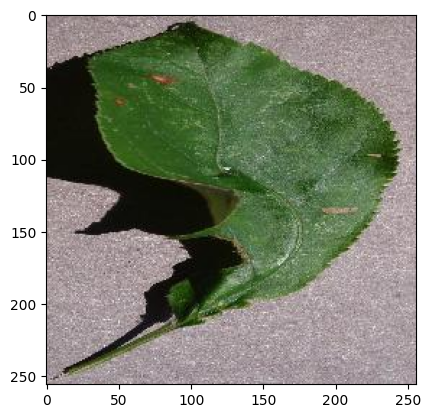

In [ ]:
image_path ="/content/plantvillage dataset/color/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG"
img = mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)

plt.show()

here the 2d array of a particular image

In [ ]:
print(img)

[[[154 138 141]
  [156 140 143]
  [152 136 139]
  ...
  [173 158 161]
  [165 150 153]
  [167 152 155]]

 [[152 136 139]
  [158 142 145]
  [157 141 144]
  ...
  [155 140 143]
  [155 140 143]
  [167 152 155]]

 [[147 131 134]
  [159 143 146]
  [159 143 146]
  ...
  [148 133 136]
  [150 135 138]
  [164 149 152]]

 ...

 [[ 83  71  73]
  [159 147 149]
  [185 173 175]
  ...
  [153 140 147]
  [173 160 167]
  [171 158 165]]

 [[164 152 152]
  [186 174 174]
  [174 162 162]
  ...
  [159 146 153]
  [157 144 151]
  [155 142 149]]

 [[148 137 135]
  [154 143 141]
  [143 131 131]
  ...
  [193 180 187]
  [178 165 172]
  [164 151 158]]]


organize your dataset

In [19]:
import os
import shutil
from sklearn.model_selection import train_test_split

get list of all classes

In [22]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Reshape, Multiply
from tensorflow.keras.models import Model

def se_block(input_tensor, reduction=16):
    channels = int(input_tensor.shape[-1])  # Ensure channels is an integer
    x = GlobalAveragePooling2D()(input_tensor)
    x = Dense(channels // reduction, activation='relu')(x)
    x = Reshape((1, 1, channels // reduction))(x)
    x = Dense(channels, activation='sigmoid')(x)
    x = Reshape((1, 1, channels))(x)
    return Multiply()([input_tensor, x])

def create_model(img_size, num_classes):
    inputs = Input(shape=(img_size, img_size, 3))
    x = Conv2D(32, (3, 3), activation="relu")(inputs)
    x = se_block(x)

    x = MaxPooling2D(2, 2)(x)

    x = Conv2D(32, (3, 3), activation="relu")(x)
    x = se_block(x)
    x = MaxPooling2D(2, 2)(x)

    print(x.shape)
    x = Flatten()(x)
    print(x.shape)
    x = Dense(256, activation="relu")(x)
    print(x.shape)
    output = Dense(num_classes, activation='softmax')(x)
    print(output.shape)

    model = Model(inputs, output)
    return model

# Example usage
img_size = 224
batch_size=64
num_classes = train_generator.num_classes # Assuming you have 10 classes, replace this with train_generator.num_classes in your actual code
model = create_model(img_size, num_classes)
model.summary()


(None, 54, 54, 32)
(None, 93312)
(None, 256)
(None, 38)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 222, 222, 32)         896       ['input_2[0][0]']             
                                                                                                  
 global_average_pooling2d_2  (None, 32)                   0         ['conv2d_2[0][0]']            
  (GlobalAveragePooling2D)                                                                        
                                                                                                  
 dense_6 (Dense)             (None, 

here value 679 because = 43567/64


In [ ]:
TypeError

TypeError

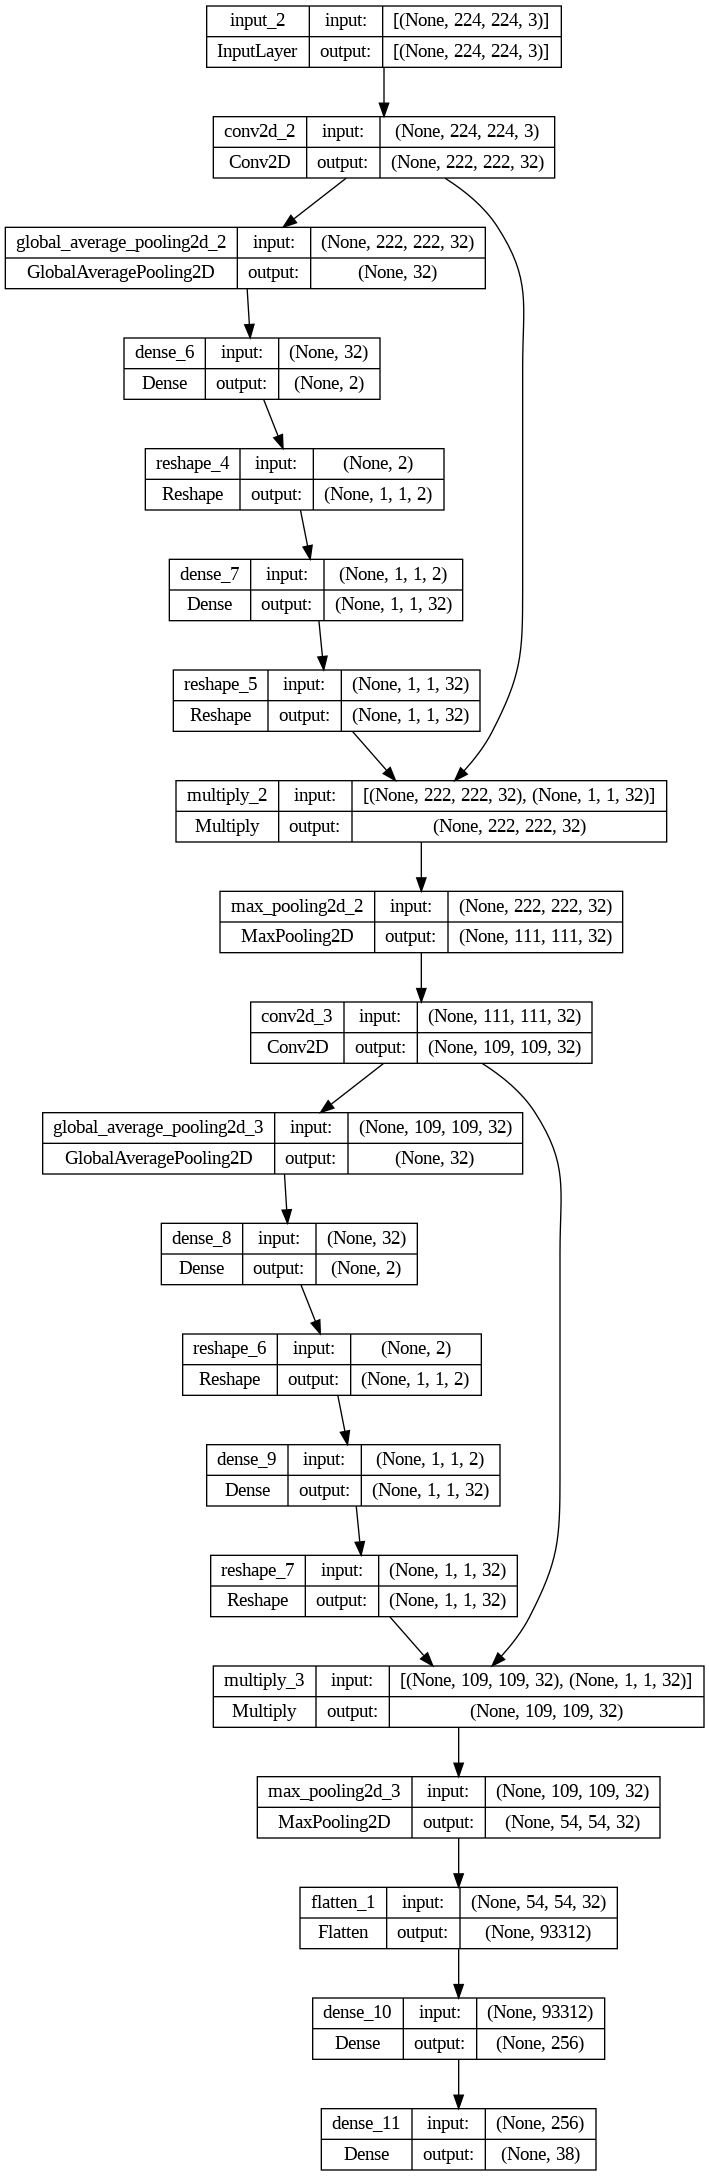

In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your Keras model
plot_model(model, to_file='model_plot2.png', show_shapes=True)

plot_model(model, to_file='/content/model_plot2.png', show_shapes=True)


In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [25]:
history= model.fit(train_generator, steps_per_epoch=train_generator.samples//batch_size
                   ,epochs=5,
                   validation_data=validation_generator,
                   validation_steps=validation_generator.samples//batch_size)

Epoch 1/5
679/679 [==============================] - 86s 113ms/step - loss: 1.3346 - accuracy: 0.6245 - val_loss: 0.9009 - val_accuracy: 0.7299
Epoch 2/5
679/679 [==============================] - 71s 105ms/step - loss: 0.5834 - accuracy: 0.8218 - val_loss: 0.7028 - val_accuracy: 0.7909
Epoch 3/5
679/679 [==============================] - 72s 106ms/step - loss: 0.3967 - accuracy: 0.8750 - val_loss: 0.5689 - val_accuracy: 0.8307
Epoch 4/5
679/679 [==============================] - 90s 132ms/step - loss: 0.2937 - accuracy: 0.9068 - val_loss: 0.6899 - val_accuracy: 0.8248
Epoch 5/5
679/679 [==============================] - 109s 161ms/step - loss: 0.2190 - accuracy: 0.9331 - val_loss: 0.6474 - val_accuracy: 0.8363


model evaluation

In [ ]:
print("evaluating model.. ")
val_loss, val_accuracy = model.evaluating(validation_generator , steps=validation_generator.n//batch_size )
print(f"Validation Accuracy:{val_accuracy*100:.2f}%")


In [ ]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

function to laod and preprocess the Image uisng pillow

In [35]:
# function to load and preprocess the image using pillow
def load_and_preprocess_image(image_path, target_size=(224,224)):
  # to load the image
  img=Image.open(image_path)
  # resize the image
  img=img.resize(target_size)
  #convert the image to a numpy array
  img_array=np.array(img)
  # add batch dimension
  img_array=np.expand_dims(img_array, axis=0)
  # scale the image values to [0,1]
  img_array=img_array.astype("float32")/255.
  return img_array

Function to predict the class of an image

In [36]:
def predict_image_class(model,image_path,class_indices):
  preprocess_img= load_and_preprocess_image(image_path)
  predictions = model.predict(preprocess_img)
  predicted_class_index = np.argmax(predictions, axis=1)[0]# use this to got highest probability value
  predict_class_name= class_indices(predicted_class_index)
  return predicted_class_name

create mapping from class indices to class numbers

In [37]:
class_indices={v:k for k , v in train_generator.class_indices.items()}


In [32]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

example to usage the model

1/1 [==============================] - 0s 19ms/step
Predicted Class Name: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot


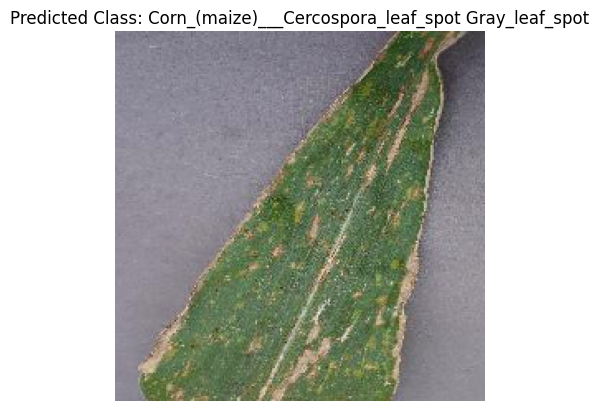

In [43]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Function to load and preprocess the image using PIL
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype("float32") / 255.
    return img_array, img

# Function to predict the image class
def predict_image_class(model, image_path, class_indices):
    preprocess_img, img_pil = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocess_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]  # Get the highest probability value
    predicted_class_name = class_indices[predicted_class_index]  # Get the class name from the dictionary
    return predicted_class_name, img_pil

# Function to plot the image with the predicted class name
def plot_image_with_prediction(image_path, predicted_class_name):
    # Load and plot the image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {predicted_class_name}')
    plt.show()

# Assuming `train_generator` is already defined and used for training
class_indices = {v: k for k, v in train_generator.class_indices.items()}

# Example usage
image_path = "/content/drive/MyDrive/test data sets/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/img_111.png"
predicted_class_name, img_pil = predict_image_class(model, image_path, class_indices)
print("Predicted Class Name:", predicted_class_name)

# Plot the image with the predicted class name
plot_image_with_prediction(image_path, predicted_class_name)


this model to predict multiple image once a while

1/1 [==============================] - 0s 17ms/step


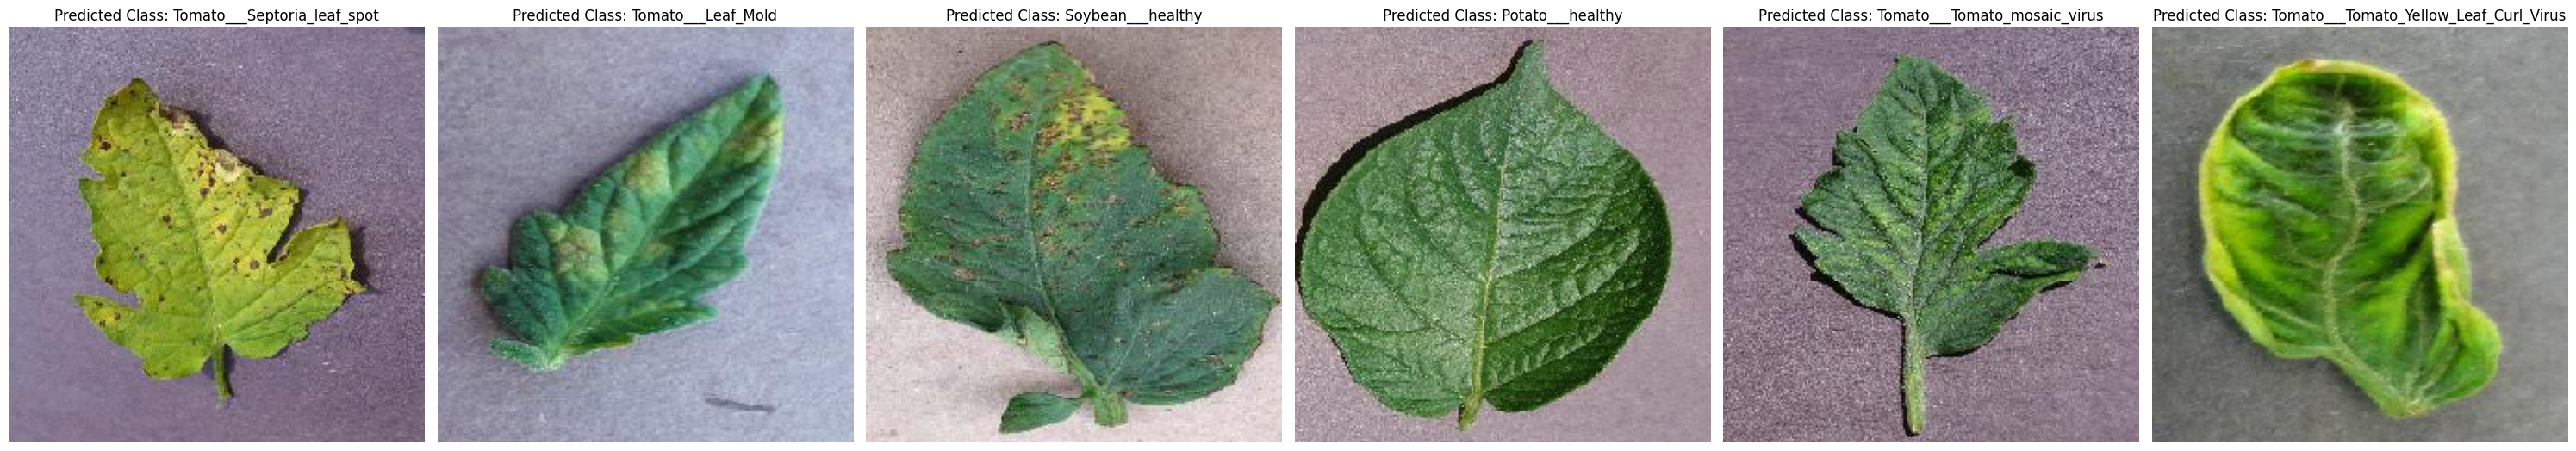

In [47]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Function to load and preprocess the image using PIL
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype("float32") / 255.
    return img_array, img

# Function to predict the image class
def predict_image_class(model, image_paths, class_indices):
    predicted_results = []
    for image_path in image_paths:
        preprocess_img, img_pil = load_and_preprocess_image(image_path)
        predictions = model.predict(preprocess_img)
        predicted_class_index = np.argmax(predictions, axis=1)[0]  # Get the highest probability value
        predicted_class_name = class_indices[predicted_class_index]  # Get the class name from the dictionary
        predicted_results.append((predicted_class_name, img_pil))
    return predicted_results

# Function to plot the image with the predicted class name
def plot_images_with_predictions(predictions):
    num_images = len(predictions)
    fig, axes = plt.subplots(1, num_images, figsize=(30, 10))
    for i, (predicted_class_name, img_pil) in enumerate(predictions):
        axes[i].imshow(img_pil)
        axes[i].axis('off')
        axes[i].set_title(f'Predicted Class: {predicted_class_name}')
    plt.tight_layout()
    plt.show()

# Assuming `train_generator` is already defined and used for training
class_indices = {v: k for k, v in train_generator.class_indices.items()}

# Example usage with multiple images
image_paths = [
    "/content/drive/MyDrive/test data sets/Tomato___Septoria_leaf_spot/img_1117.png",
    "/content/drive/MyDrive/test data sets/Tomato___Leaf_Mold/img_1133.png",
    "/content/drive/MyDrive/test data sets/Tomato___Bacterial_spot/img_1027.png",
    "/content/drive/MyDrive/test data sets/Potato___healthy/img_1591.png",
    "/content/drive/MyDrive/test data sets/Tomato___Tomato_mosaic_virus/img_1470.png",
    "/content/drive/MyDrive/test data sets/Tomato___Tomato_Yellow_Leaf_Curl_Virus/img_1015.png"

]

# Predict classes for multiple images
predicted_results = predict_image_class(model, image_paths, class_indices)

# Plot the images with their predicted class names
plot_images_with_predictions(predicted_results)


saving the class names as json files

In [48]:
json.dump(class_indices,open('class_indices.json','w'))

In [49]:
model.save("/content/drive/MyDrive/test data sets")


In [50]:
import pickle

In [51]:
filename= "trained_model.sav"
pickle.dump(model,open(filename,'wb'))

In [53]:
# loading the saved model
loaded_model=pickle.load(open("/content/trained_model.sav",'rb'))